In [1]:
sigma = 10
rho = 28
beta = 8/3
h = 0.01

def fx(x, y):
    return sigma * (y - x)

def fy(x, y, z):
    return x * (rho - z) - y

def fz(x, y, z):
    return x * y - beta * z

def k1(x, y):
    return fx(x, y)

def l1(x, y, z):
    return fy(x, y, z)

def m1(x, y, z):
    return fz(x, y, z)

def k2(x, y, z):
    return fx(x + h * k1(x, y) / 2, y + h * l1(x, y, z) / 2)

def l2(x, y, z):
    return fy(x + h * k1(x, y) / 2, y + h * l1(x, y, z) / 2, z + h * m1(x, y, z) / 2)

def m2(x, y, z):
    return fz(x + h * k1(x, y) / 2, y + h * l1(x, y, z) / 2, z + h * m1(x, y, z) / 2)

def k3(x, y, z):
    return fx(x + h * k2(x, y, z) / 2, y + h * l2(x, y, z) / 2)

def l3(x, y, z):
    return fy(x + h * k2(x, y, z) / 2, y + h * l2(x, y, z) / 2, z + h * m2(x, y, z) / 2)

def m3(x, y, z):
    return fz(x + h * k2(x, y, z) / 2, y + h * l2(x, y, z) / 2, z + h * m2(x, y, z) / 2)

def k4(x, y, z):
    return fx(x + h * k3(x, y, z), y + h * l3(x, y, z))

def l4(x, y, z):
    return fy(x + h * k3(x, y, z), y + h * l3(x, y, z), z + h * m3(x, y, z))

def m4(x, y, z):
    return fz(x + h * k3(x, y, z), y + h * l3(x, y, z), z + h * m3(x, y, z))

def rk4(x, y, z):
    return x + h * (k1(x, y) + 2 * k2(x, y, z) + 2 * k3(x, y, z) + k4(x, y, z)) / 6, y + h * (l1(x, y, z) + 2 * l2(x, y, z) + 2 * l3(x, y, z) + l4(x, y, z)) / 6, z + h * (m1(x, y, z) + 2 * m2(x, y, z) + 2 * m3(x, y, z) + m4(x, y, z)) / 6

In [6]:
#Heun's Method

def heun(x, y, z):
    return x + h * (k1(x, y) + k2(x, y, z)) / 2, y + h * (l1(x, y, z) + l2(x, y, z)) / 2, z + h * (m1(x, y, z) + m2(x, y, z)) / 2


In [13]:
%%time

xn = 1
yn = 1
zn = 1
vals = []

for i in range(50000):
        vals.append([xn, yn, zn])
        x, y, z = heun(xn, yn, zn)
        xn, yn, zn = x, y, z

CPU times: total: 188 ms
Wall time: 286 ms


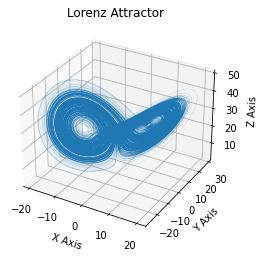

In [10]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
ax.plot([i[0] for i in vals], [i[1] for i in vals], [i[2] for i in vals], lw=0.1)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()